In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test=pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Data Exploration

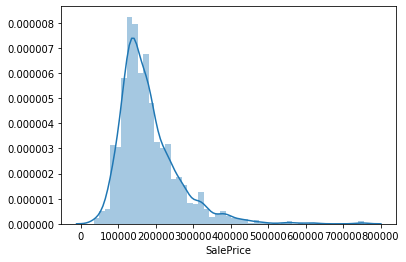

In [5]:
sns.distplot(train['SalePrice'])

Sale Price is not normally distributed. We can check istead log distribution by taking log of all values in the Sale Price  

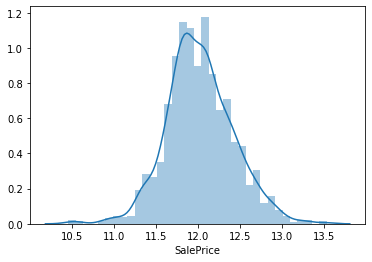

In [6]:
target=np.log(train['SalePrice'])
sns.distplot(target)

In [7]:
train.drop('SalePrice',axis=1,inplace=True)
xy=pd.concat([train,test],axis=0)
pd.pandas.set_option('display.max_columns', None)
xy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
numerical_data=xy.select_dtypes(include=[np.number])
print(f"There are {numerical_data.shape[1]} numerical features in dataset")
numerical_data.columns

There are 37 numerical features in dataset


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [9]:
categorical_data=xy.select_dtypes(exclude=[np.number])
print(f"There are {categorical_data.shape[1]} categorical features in dataset")
categorical_data.columns

There are 43 categorical features in dataset


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Missing Values

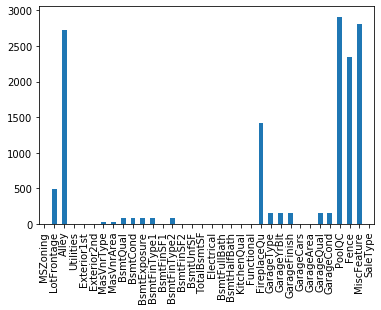

In [10]:
Missing_data=xy.isnull().sum() 
Missing_data=Missing_data[Missing_data>0]
Missing_data.plot.bar()

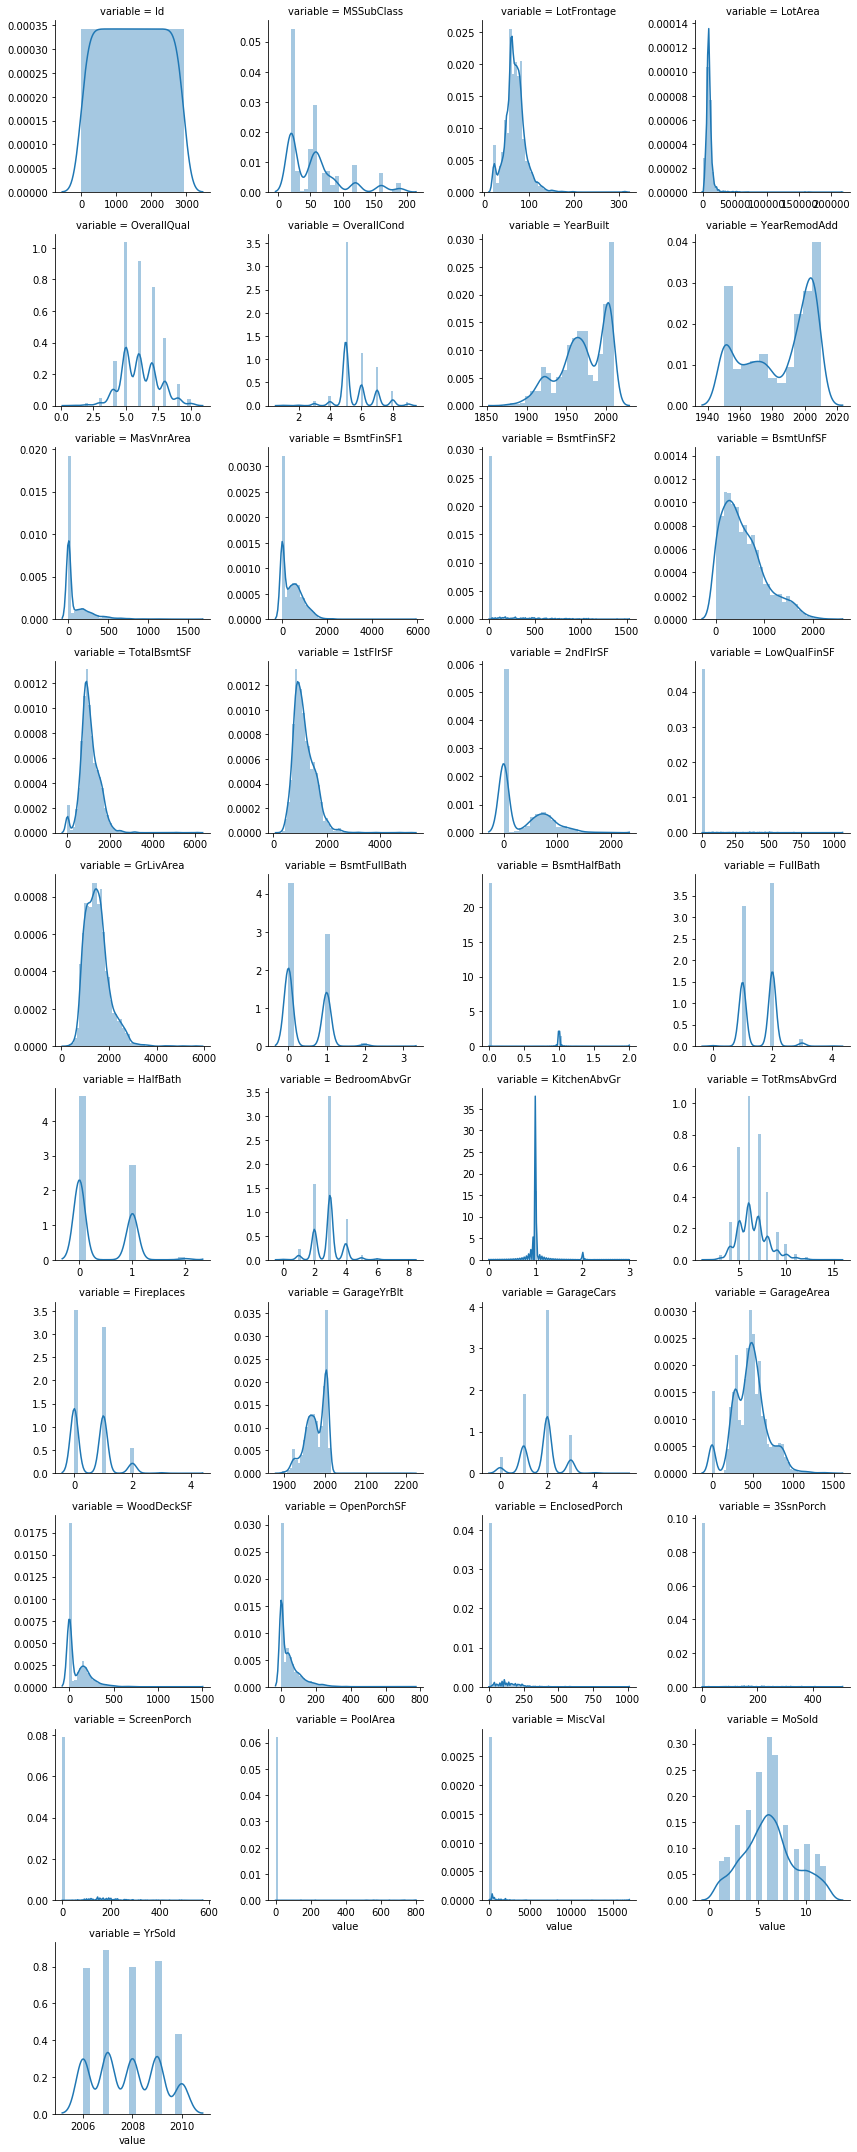

In [11]:
f=pd.melt(xy,value_vars=(numerical_data))
g=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
g.map(sns.distplot,'value')

In [12]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    xy[feature]=np.log(xy[feature]).round(2)
xy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,4.17,9.04,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,6.75,854,0,7.44,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,4.38,9.17,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,7.14,0,0,7.14,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,4.22,9.33,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,6.82,866,0,7.49,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,4.09,9.16,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,6.87,756,0,7.45,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,4.43,9.57,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,7.04,1053,0,7.70,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [13]:
xy['MSSubClass']=xy.MSSubClass.apply(lambda x: str(x))
xy['MoSold']=xy.MoSold.apply(lambda x: str(x))
xy['YrSold']=xy.YrSold.apply(lambda x: str(x))
xy['GarageYrBlt']=xy.GarageYrBlt.apply(lambda x: str(x))

C:\Users\Maninder Singh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


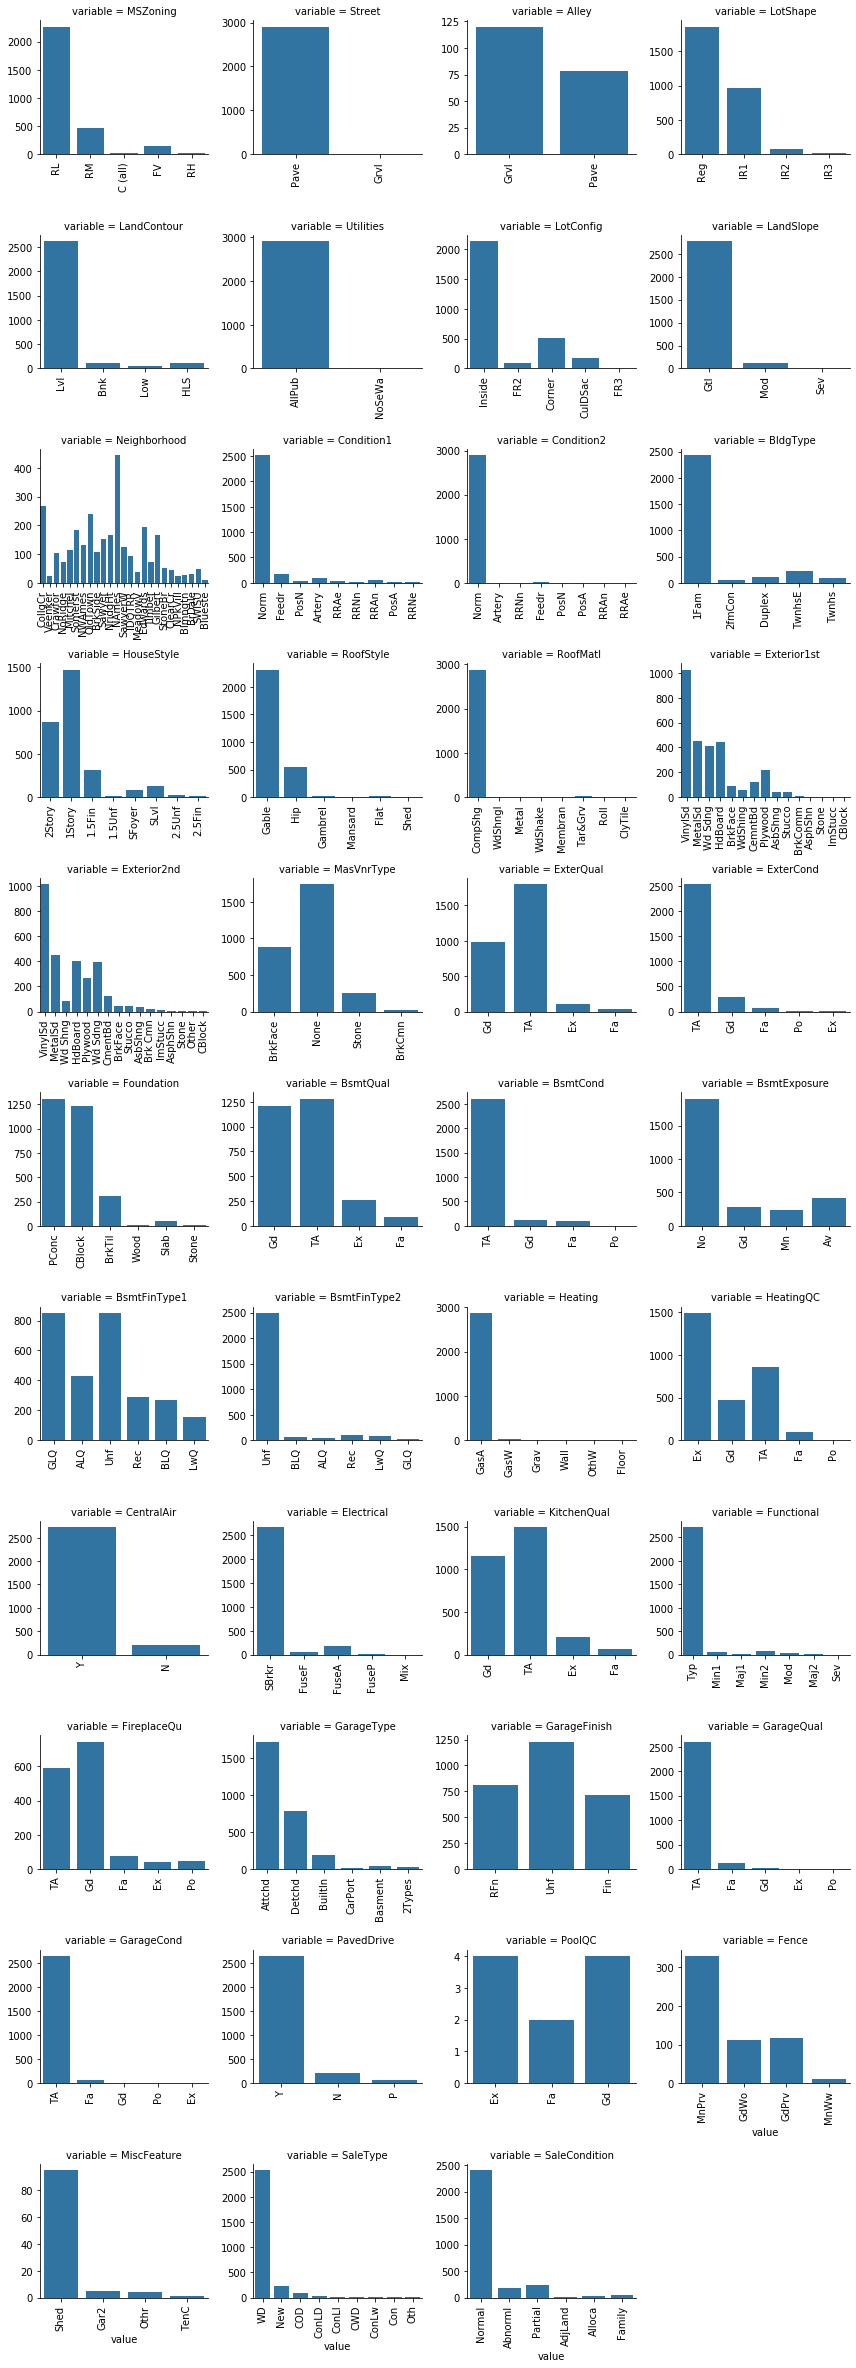

In [14]:
f=pd.melt(xy,value_vars=categorical_data)
g=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
plt.xticks(rotation="vertical")
g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()

# Handelling Missing Values

### Missing Values in Numerical Features 

In [15]:
num_feature_na=[feature for feature in xy.columns if xy[feature].dtype!='O' and xy[feature].isnull().sum()>0]

for feature in num_feature_na:
    print(f"{feature}   :{xy[feature].isnull().sum()/xy.shape[0]*100}% missing value ")

LotFrontage   :16.649537512846866% missing value 
MasVnrArea   :0.7879410757108599% missing value 
BsmtFinSF1   :0.0342583076396026% missing value 
BsmtFinSF2   :0.0342583076396026% missing value 
BsmtUnfSF   :0.0342583076396026% missing value 
TotalBsmtSF   :0.0342583076396026% missing value 
BsmtFullBath   :0.0685166152792052% missing value 
BsmtHalfBath   :0.0685166152792052% missing value 
GarageCars   :0.0342583076396026% missing value 
GarageArea   :0.0342583076396026% missing value 


In [16]:
for feature in num_feature_na:
    mean_val=xy[feature].mean()
    xy[feature].fillna(mean_val,inplace=True)
xy[num_feature_na].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageCars      0
GarageArea      0
dtype: int64

### Missing Values in Categorical Features 

In [17]:
cat_feature_na=[feature for feature in xy.columns if xy[feature].dtype=='O' and xy[feature].isnull().sum()>0]

for feature in cat_feature_na:
    print(f"{feature}     :{xy[feature].isnull().sum()/xy.shape[0]*100}% missing value")

MSZoning     :0.1370332305584104% missing value
Alley     :93.21685508735868% missing value
Utilities     :0.0685166152792052% missing value
Exterior1st     :0.0342583076396026% missing value
Exterior2nd     :0.0342583076396026% missing value
MasVnrType     :0.8221993833504625% missing value
BsmtQual     :2.774922918807811% missing value
BsmtCond     :2.8091812264474134% missing value
BsmtExposure     :2.8091812264474134% missing value
BsmtFinType1     :2.7064063035286057% missing value
BsmtFinType2     :2.7406646111682083% missing value
Electrical     :0.0342583076396026% missing value
KitchenQual     :0.0342583076396026% missing value
Functional     :0.0685166152792052% missing value
FireplaceQu     :48.646796848235695% missing value
GarageType     :5.378554299417608% missing value
GarageFinish     :5.4470709146968135% missing value
GarageQual     :5.4470709146968135% missing value
GarageCond     :5.4470709146968135% missing value
PoolQC     :99.65741692360398% missing value
Fence   

Droping those features which have more than 60% null values 

In [18]:
xy=xy.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [19]:
cat_feature_na=[feature for feature in xy.columns if xy[feature].dtype=='O' and xy[feature].isnull().sum()>0]
for feature in cat_feature_na:
    xy[feature]=xy[feature].fillna(xy[feature].mode()[0])
xy[cat_feature_na].isnull().sum()

MSZoning        0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
SaleType        0
dtype: int64

## Converting Categorical Features into Numerical Features

In [20]:
categorical_data=xy.select_dtypes(exclude=[np.number])
categorical_data.nunique()

MSSubClass        16
MSZoning           5
Street             2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         9
Condition2         8
BldgType           5
HouseStyle         8
RoofStyle          6
RoofMatl           8
Exterior1st       15
Exterior2nd       16
MasVnrType         4
ExterQual          4
ExterCond          5
Foundation         6
BsmtQual           4
BsmtCond           4
BsmtExposure       4
BsmtFinType1       6
BsmtFinType2       6
Heating            6
HeatingQC          5
CentralAir         2
Electrical         5
KitchenQual        4
Functional         7
FireplaceQu        5
GarageType         6
GarageYrBlt      104
GarageFinish       3
GarageQual         5
GarageCond         5
PavedDrive         3
MoSold            12
YrSold             5
SaleType           9
SaleCondition      6
dtype: int64

In [21]:
xy.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4},inplace=True)
       
xy.LandContour.replace({'Lvl':1, 'Bnk':2, 'HLS':3, 'Low':4},inplace=True)

xy.Utilities.replace({'AllPub':4, ' NoSewr':3, 'NoSeWa':2, 'ELO':1},inplace=True)

xy.LandSlope.replace({'Gtl':1, 'Mod':2, ' Sev':3},inplace=True)

xy.BldgType.replace({'1Fam':1, '2FmCon':2, 'Duplx':3, 'TwnhsE':4, 'TwnhsI':5},inplace=True)

xy.ExterQual.replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},inplace=True)

xy.BsmtQual.replace({'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2, 'NA':1},inplace=True)

xy.BsmtCond.replace({'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2, 'NA':1},inplace=True)

xy.BsmtExposure.replace({'Gd':5, 'Av':4, 'Mn':3, 'No':2, 'NA':1},inplace=True)

xy.BsmtFinType1.replace({'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Unf':2, 'Na':1},inplace=True)

xy.BsmtFinType2.replace({'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Unf':2, 'Na':1},inplace=True)

xy.HeatingQC.replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},inplace=True)

xy.KitchenQual.replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},inplace=True)

xy.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maz1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},inplace=True)

xy.FireplaceQu.replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},inplace=True)

xy.GarageFinish.replace({'Fin':4, 'RFn':3, 'Unf':2, 'NA':1},inplace=True)

xy.GarageQual.replace({'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2, 'Na':1},inplace=True)

xy.GarageCond.replace({'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2, 'Na':1},inplace=True)

xy.PavedDrive.replace({'Y':1, 'P':2, 'N':3},inplace=True)


Use of label encoder for remaining categorical features 

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
categorical_feature=xy.select_dtypes(exclude=[np.number])
for feature in categorical_feature:
    le.fit(list(xy[feature].values)) 
    xy[feature] = le.transform(list(xy[feature].values))

In [24]:
xy.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,10,3,4.170000,9.04,1,1,1,1,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,2,0,5,706.0,0,0.0,150.0,856.0,1,5,1,4,6.75,854,0,7.44,1.0,0.0,2,1,3,1,2,8,5,0,4,1,94,1,2.0,548.0,2,2,1,0,61,0,0,0,0,0,4,2,8,4
1,2,5,3,4.380000,9.17,1,1,1,1,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,1,4,1,2,2,3,4,978.0,0,0.0,284.0,1262.0,1,5,1,4,7.14,0,0,7.14,0.0,1.0,2,0,3,1,1,6,5,1,3,1,67,1,2.0,460.0,2,2,1,298,0,0,0,0,0,0,7,1,8,4
2,3,10,3,4.220000,9.33,1,2,1,1,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,2,1,5,486.0,0,0.0,434.0,920.0,1,5,1,4,6.82,866,0,7.49,1.0,0.0,2,1,3,1,2,6,5,1,3,1,92,1,2.0,608.0,2,2,1,0,42,0,0,0,0,0,11,2,8,4
3,4,11,3,4.090000,9.16,1,2,1,1,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,1,4,0,1,3,0,4,216.0,0,0.0,540.0,756.0,1,4,1,4,6.87,756,0,7.45,1.0,0.0,1,0,3,1,2,7,5,1,4,5,89,0,3.0,642.0,2,2,1,0,35,272,0,0,0,0,4,0,8,0
4,5,10,3,4.430000,9.57,1,2,1,1,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,2,2,5,655.0,0,0.0,490.0,1145.0,1,5,1,4,7.04,1053,0,7.70,1.0,0.0,2,1,4,1,2,9,5,1,3,1,91,1,3.0,836.0,2,2,1,192,84,0,0,0,0,0,3,2,8,4
5,6,9,3,4.440000,9.55,1,2,1,1,4,0,11,2,2,0,0,5,5,1993,1995,1,1,12,13,2,0.0,1,4,5,2,2,0,5,732.0,0,0.0,64.0,796.0,1,5,1,4,6.68,566,0,7.22,1.0,0.0,1,1,1,1,1,5,5,0,4,1,84,0,2.0,480.0,2,2,1,40,30,0,320,0,0,700,1,3,8,4
6,7,5,3,4.320000,9.22,1,1,1,1,4,0,21,2,2,0,2,8,5,2004,2005,1,1,12,13,3,186.0,2,4,2,3,2,2,5,1369.0,0,0.0,317.0,1686.0,1,5,1,4,7.43,0,0,7.43,1.0,0.0,2,0,3,1,2,7,5,1,4,1,95,1,2.0,636.0,2,2,1,255,57,0,0,0,0,0,10,1,8,4
7,8,10,3,4.178944,9.25,1,2,1,1,0,0,14,4,2,0,5,7,6,1973,1973,1,1,6,6,3,240.0,1,4,1,2,2,1,4,859.0,3,32.0,216.0,1107.0,1,5,1,4,7.01,983,0,7.64,1.0,0.0,2,1,3,1,1,7,5,2,3,1,64,1,2.0,484.0,2,2,1,235,204,228,0,0,0,350,2,3,8,4
8,9,9,4,3.930000,8.72,1,1,1,1,4,0,17,0,2,0,0,7,5,1931,1950,1,1,3,15,2,0.0,1,4,0,1,2,0,0,0.0,0,0.0,952.0,952.0,1,4,1,1,6.93,752,0,7.48,0.0,0.0,2,0,2,2,1,8,4,2,3,5,23,0,2.0,468.0,1,2,1,90,0,205,0,0,0,0,6,2,8,0
9,10,4,3,3.910000,8.91,1,1,1,1,0,0,3,0,0,1,1,5,6,1939,1950,1,1,8,8,2,0.0,1,4,0,1,2,0,5,851.0,0,0.0,140.0,991.0,1,5,1,4,6.98,0,0,6.98,1.0,0.0,1,0,2,2,1,5,5,2,3,1,31,1,1.0,205.0,3,2,1,0,4,0,0,0,0,0,0,2,8,4


## Feature Scaling

In [25]:
xy.drop('Id',axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler

In [26]:
pd.pandas.set_option('display.max_rows', None)

pd.isnull(xy).sum()>0

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF         False
LowQualFinS

In [27]:
std_scl=StandardScaler()
std_scl.fit(xy) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
xy=std_scl.transform(xy)

In [29]:
xy=pd.DataFrame(xy)
xy.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,0.774940,-0.042157,-0.027374,-0.107454,0.064249,-0.701900,-0.308471,0.018512,0.588555,-0.21626,-1.248476,-0.046258,-0.009816,-0.416638,1.031721,0.646183,-0.507284,1.046258,0.896833,-0.482926,-0.116923,0.742788,0.750334,-1.267151,0.525202,1.039805,0.376461,0.834618,0.631705,-0.009441,-0.627142,1.172283,0.580907,-0.323051,-0.29313,-0.934863,-0.444328,-0.103206,0.885619,0.26829,0.300615,-0.783998,1.207379,-0.101197,0.551655,1.087023,-0.249895,0.781366,1.232599,0.169927,-0.207698,0.738935,0.986849,0.215976,-0.924311,0.464691,-0.688235,0.905225,0.280525,0.306528,0.348900,0.144976,0.120517,-0.31503,-0.740760,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.840083,0.157646,0.319311,0.204967
1,-0.577152,-0.042157,0.615379,0.147569,0.064249,-0.701900,-0.308471,0.018512,-0.658174,-0.21626,1.941064,-1.190557,-0.009816,-0.416638,-0.536817,-0.063185,2.188279,0.154764,-0.395604,-0.482926,-0.116923,-0.507795,-0.657990,0.384843,-0.572250,-0.683756,0.376461,-0.541017,0.631705,-0.009441,2.258765,0.690122,1.178112,-0.323051,-0.29313,-0.629896,0.477111,-0.103206,0.885619,0.26829,0.300615,0.423616,-0.785025,-0.101197,-0.371671,-0.819679,3.822419,0.781366,-0.756321,0.169927,-0.207698,-0.771535,-0.287758,0.215976,0.623632,-1.159779,-0.688235,-0.158920,0.280525,0.306528,-0.059792,0.144976,0.120517,-0.31503,1.614879,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,0.164506,-0.602962,0.319311,0.204967
2,0.774940,-0.042157,0.125662,0.461442,0.064249,1.052249,-0.308471,0.018512,0.588555,-0.21626,-1.248476,-0.046258,-0.009816,-0.416638,1.031721,0.646183,-0.507284,0.980221,0.848965,-0.482926,-0.116923,0.742788,0.750334,-1.267151,0.334828,1.039805,0.376461,0.834618,0.631705,-0.009441,0.334827,1.172283,0.097873,-0.323051,-0.29313,-0.288516,-0.299076,-0.103206,0.885619,0.26829,0.300615,-0.567247,1.235375,-0.101197,0.705542,1.087023,-0.249895,0.781366,1.232599,0.169927,-0.207698,0.738935,-0.287758,0.215976,0.623632,-1.159779,-0.688235,0.826399,0.280525,0.306528,0.627553,0.144976,0.120517,-0.31503,-0.740760,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.503958,0.157646,0.319311,0.204967
3,1.045358,-0.042157,-0.272233,0.127951,0.064249,1.052249,-0.308471,0.018512,-1.904903,-0.21626,-1.080605,-0.046258,-0.009816,-0.416638,1.031721,0.646183,-0.507284,-1.859351,-0.682812,-0.482926,-0.116923,1.055433,1.313664,0.384843,-0.572250,-0.683756,0.376461,-1.916652,-0.806631,3.435397,-0.627142,0.690122,-0.494941,-0.323051,-0.29313,-0.047275,-0.671283,-0.103206,-0.158453,0.26829,0.300615,-0.412424,0.978742,-0.101197,0.582432,1.087023,-0.249895,-1.027363,-0.756321,0.169927,-0.207698,0.738935,0.349546,0.215976,0.623632,0.464691,1.577932,0.708161,-0.941643,1.619961,0.785457,0.144976,0.120517,-0.31503,-0.740760,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.089592,-0.840083,-1.363569,0.319311,-3.505415
4,0.774940,-0.042157,0.768415,0.932253,0.064249,1.052249,-0.308471,0.018512,-0.658174,-0.21626,0.430229,-0.046258,-0.009816,-0.416638,1.031721,1.355551,-0.507284,0.947203,0.753229,-0.482926,-0.116923,0.742788,0.750334,-1.267151,1.387486,1.039805,0.376461,0.834618,0.631705,-0.009441,1.296796,1.172283,0.468931,-0.323051,-0.29313,-0.161068,0.211573,-0.103206,0.885619,0.26829,0.300615,0.113971,1.671651,-0.101197,1.351871,1.087023,-0.249895,0.781366,1.232599,1.385655,-0.207698,0.738935,1.624153,0.215976,0.623632,-1.159779,-0.688235,0.786987,0.280525,1.619961,1.686437,0.144976,0.120517,-0.31503,0.776967,0.540424,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.174946,0.157646,0.319311,0.204967


In [30]:
x=xy[:1460]
y=xy[1460:]

## Train-Test Split 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
x_train,x_test,target_train,target_test=train_test_split(x,target,test_size=.30,random_state=0)

## Using XgBoost to Train Model

In [33]:
import xgboost
xg=xgboost.XGBRegressor()
xg.fit(x_train,target_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [34]:
y2_pred=xg.predict(x_test)

In [35]:
mean_squared_error(target_test,y2_pred)

0.016780642671324633

In [36]:
r2_score(target_test,y2_pred)

0.8913952532693872

In [37]:
result=xg.predict(y)
XGB=pd.DataFrame({"Id":test.Id,"SalePrice":result})
XGB.to_csv("XGB1.csv",index=False)